# Advanced programming for data analysis: pandas.

pandas is a Python package providing fast, flexible, and expressive data structures designed to work with relational or labeled data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python.

pandas is well suited for:

+ Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
+ Ordered and unordered (not necessarily fixed-frequency) time series data.
+ Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels.

Key features:

+ Easy handling of missing data
+ Size mutability: columns can be inserted and deleted from DataFrame
+ Powerful, flexible ``group by`` functionality to perform split-apply-combine operations on data sets
+ Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
+ Intuitive merging and joining data sets
+ Flexible reshaping and pivoting of data sets
+ Hierarchical labeling of axes
+ Robust IO tools for loading data from flat files, Excel files, databases, and HDF5
+ Time series functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.


Importing pandas:

In [1]:
import pandas as pd                            # convention, alias 'pd'


## Pandas Data Structure

###Series

A Series is a single vector of data with an index that labels every element in the vector. If we do not specify the index, a sequence of integers is assigned as the index.

In [2]:
c = pd.Series([1956, 1967, 1989, 2000])
c

0    1956
1    1967
2    1989
3    2000
dtype: int64

Its values are stored in a NumPy array (``values``) and the index in a pandas ``Index`` object:

In [3]:
c.values

array([1956, 1967, 1989, 2000])

In [4]:
c.index

Int64Index([0, 1, 2, 3], dtype='int64')

We can assign labels to the index, while creating the serie

In [5]:
c = pd.Series([1956, 1967, 1989, 2000], index = ['a','b','c','d'])
c

a    1956
b    1967
c    1989
d    2000
dtype: int64

Labels can be used to refer to the values in the serie

In [51]:
c['d']

2000

We can still use positional index

In [7]:
c[3]

2000

We can give both the array of values and the index meaningful labels names

In [8]:
c.name = 'years'
c.index.name = 'obs'
c

obs
a      1956
b      1967
c      1989
d      2000
Name: years, dtype: int64

###Time Series

In working with time series data, we will frequently seek to:

- generate sequences of fixed-frequency dates and time spans
- conform or convert time series to a particular frequency
- compute “relative” dates based on various non-standard time increments (e.g. 5 business days before the last business day of the year), or “roll” dates forward or backward

pandas provides a relatively compact and self-contained set of tools for performing the above tasks.

Create a range of dates:

In [9]:
# 72 hours starting with midnight Jan 1st, 2011
rng = pd.date_range('1/1/2011', periods=72, freq='H')

Index pandas objects with dates:

In [17]:
import numpy as np
ts = pd.Series(np.random.randint(0,500,len(rng)),index = rng) # index is date_range
ts.head() # return 5 first rows


2011-01-01 00:00:00    353
2011-01-01 01:00:00     46
2011-01-01 02:00:00    419
2011-01-01 03:00:00    205
2011-01-01 04:00:00     94
Freq: H, dtype: int64

Change frequency and fill gaps:

In [18]:
# to 45 minute frequency and forward fill
converted = ts.asfreq('45Min', method='pad')
converted.head()

2011-01-01 00:00:00    353
2011-01-01 00:45:00    353
2011-01-01 01:30:00     46
2011-01-01 02:15:00    419
2011-01-01 03:00:00    205
Freq: 45T, dtype: int64

In [19]:
ts.resample('D', how='mean')

2011-01-01    262.125000
2011-01-02    290.250000
2011-01-03    235.333333
Freq: D, dtype: float64

###DataFrames 
DataFrames are designed to store heterogeneous multivarite data, where for every index there are multiple fields or columns of data, often of different data type.

A `DataFrame` os a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored interally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.


##Reading tabular data

The ‘pandas’ Python library provides several operators, <code>read_csv(), read_table(), 
read_excel() ...</code> that allows you to access data ﬁles in tabular format on your computer as well as data stored in web repositories.

Reading in a data table is simply a matter of knowing the name (and location) of the data set.

###EUROSTAT data

Eurostat is the home of the European Commssion data. Eurostat’s main role is to process and publish comparable statistical information at European level. Data in eurostat is provided by each member state. Eurostat's re-use policy is free re-use of its data, both for non-commercial and commercial purposes (with some minor exceptions).

In this case study we are going to retrieve Eurostat data. The amount of data in the database is huge, thus we are going to use a small subset for illustration purposes. In our first study we are going to focus on **indicators on education finance data** among the member states. The data is already downloaded and provided as is in the file `educ_figdp_1_Data.csv`. You can download it directly following this links `Database by terms>Population and social conditions>Education and training>Indicators on education finance > Expenditure on education as % of GDP or public expenditure (educ_figdp)`

Let us start reading the data:

In [30]:
edu=pd.read_csv('./educ_figdp/educ_figdp_1_Data.csv',na_values=':')
!cat './educ_figdp/educ_figdp_1_Data.csv'

"TIME","GEO","INDIC_ED","Value","Flag and Footnotes"
"2000","European Union (28 countries)","Total public expenditure on education as % of GDP, for all levels of education combined",":",""
"2001","European Union (28 countries)","Total public expenditure on education as % of GDP, for all levels of education combined",":",""
"2002","European Union (28 countries)","Total public expenditure on education as % of GDP, for all levels of education combined","5.00","e"
"2003","European Union (28 countries)","Total public expenditure on education as % of GDP, for all levels of education combined","5.03","e"
"2004","European Union (28 countries)","Total public expenditure on education as % of GDP, for all levels of education combined","4.95","e"
"2005","European Union (28 countries)","Total public expenditure on education as % of GDP, for all levels of education combined","4.92","e"
"2006","European Union (28 countries)","Total public expenditure on education as % of GDP, for all levels of educat

Check the shape and type of `DataFrame`

In [31]:
edu.shape 

(384, 5)

In [32]:
type(edu)

pandas.core.frame.DataFrame

It is also possible to create a `DataFrame` from a multidimensional numpy array or by passing a `dict` of objects that can be converted to series-like.

In [34]:
import numpy as np
dates = pd.date_range('19781212',periods=7)
df = pd.DataFrame(np.random.randn(7,3),index=dates, columns=['A','B','C'])
df

,A,B,C
1978-12-12,-0.870500,-0.229482,0.113202
1978-12-13,1.020067,0.351761,-0.095716
1978-12-14,0.398354,-1.738034,-0.311330
1978-12-15,-0.233574,0.641977,-0.116662
1978-12-16,-0.914695,0.219255,-0.626215
1978-12-17,-1.233635,-0.263687,0.780187
1978-12-18,1.292112,-0.986922,0.724968


In [35]:
dictionary = dict({'A' : 1, 
                   'B' : pd.date_range('19781212',periods=7), 
                   'C' : range(7),
                   'D' : np.arange(7)[::-1],
                   'E' : 'foo' })
pd.DataFrame(dictionary, index=range(1,8))

,A,B,C,D,E
1,1,1978-12-12,0,6,foo
2,1,1978-12-13,1,5,foo
3,1,1978-12-14,2,4,foo
4,1,1978-12-15,3,3,foo
5,1,1978-12-16,4,2,foo
6,1,1978-12-17,5,1,foo
7,1,1978-12-18,6,0,foo


We can also read data directly from the *clipboard*. Just `copy` some rows to the clipboard and use `read_clipboard()` function. By default it uses `S+` (space characters) as column separator.

In [39]:
clipboard = pd.read_clipboard()
clipboard

,A,B,C,D,E
1,1,1978-12-12,0,6,foo
2,1,1978-12-13,1,5,foo
3,1,1978-12-14,2,4,foo


## Viewing Data

Take a look at the **Eurostat** data:

The 5 first rows:

In [40]:
edu.head()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,e
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,e
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,e


The last 5 rows:

In [41]:
edu.tail()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
379,2007,Finland,Total public expenditure on education as % of ...,5.90,NaN
380,2008,Finland,Total public expenditure on education as % of ...,6.10,NaN
381,2009,Finland,Total public expenditure on education as % of ...,6.81,NaN
382,2010,Finland,Total public expenditure on education as % of ...,6.85,NaN
383,2011,Finland,Total public expenditure on education as % of ...,6.76,NaN


Data in CSV and databases are often organized in what is called *stacked* or *record* formats. In this case for each year (`TIME`) and country (`GEO`) of the EU as well as some reference countries such as Japan and United States, we have twelve indicators (`INDIC_ED`) on education finance with their values (`Value`): 

In [43]:
edu.columns  # This is not a function; it is an attribute of the data frame.

Index([u'TIME', u'GEO', u'INDIC_ED', u'Value', u'Flag and Footnotes'], dtype='object')

The values of the indexes can be retrieved using:

In [44]:
edu.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], dtype='int64')

The values of the `DataFrame` can be retrieved as a numpy array using:

In [45]:
edu.values

array([[2000, 'European Union (28 countries)',
        'Total public expenditure on education as % of GDP, for all levels of education combined',
        nan, nan],
       [2001, 'European Union (28 countries)',
        'Total public expenditure on education as % of GDP, for all levels of education combined',
        nan, nan],
       [2002, 'European Union (28 countries)',
        'Total public expenditure on education as % of GDP, for all levels of education combined',
        5.0, 'e'],
       ..., 
       [2009, 'Finland',
        'Total public expenditure on education as % of GDP, for all levels of education combined',
        6.81, nan],
       [2010, 'Finland',
        'Total public expenditure on education as % of GDP, for all levels of education combined',
        6.85, nan],
       [2011, 'Finland',
        'Total public expenditure on education as % of GDP, for all levels of education combined',
        6.76, nan]], dtype=object)

To get quick stadistical information about the numeric columns in a data frame is with the function `describe()`. The result is itself a data frame.

In [46]:
edu.describe()


,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


## Sorting

We can sort the `DataFrame` using any column. If we want to see the data sorted by Time, it can be done like this:

In [47]:
s = edu.sort(columns='Value', ascending= False)
s.head(9)

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
130,2010,Denmark,Total public expenditure on education as % of ...,8.81,d
131,2011,Denmark,Total public expenditure on education as % of ...,8.75,d
129,2009,Denmark,Total public expenditure on education as % of ...,8.74,d
121,2001,Denmark,Total public expenditure on education as % of ...,8.44,d
122,2002,Denmark,Total public expenditure on education as % of ...,8.44,d
124,2004,Denmark,Total public expenditure on education as % of ...,8.43,NaN
123,2003,Denmark,Total public expenditure on education as % of ...,8.33,NaN
125,2005,Denmark,Total public expenditure on education as % of ...,8.30,d
120,2000,Denmark,Total public expenditure on education as % of ...,8.28,i


We can sort by index again, using the `sort_index` function and specifying `axis=0`

In [48]:
s.sort_index(axis=0,ascending=True).head()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,e
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,e
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,e


##Selection

We can acces to each column by name:

In [49]:
edu['Value']

0      NaN
1      NaN
2     5.00
3     5.03
4     4.95
5     4.92
6     4.91
7     4.92
8     5.04
9     5.38
10    5.41
11    5.25
12    4.91
13    4.99
14    5.00
...
369    4.09
370    4.22
371    4.06
372    5.89
373    6.06
374    6.22
375    6.43
376    6.42
377    6.30
378    6.18
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

We can acces to a *slice* of rows using []

In [50]:
edu[10:14]

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
10,2010,European Union (28 countries),Total public expenditure on education as % of ...,5.41,e
11,2011,European Union (28 countries),Total public expenditure on education as % of ...,5.25,e
12,2000,European Union (27 countries),Total public expenditure on education as % of ...,4.91,s
13,2001,European Union (27 countries),Total public expenditure on education as % of ...,4.99,s


If we want to select a subset of columns and rows we can use `ix` indexing

In [51]:
edu.ix[15:20,['TIME','GEO','Value']]

,TIME,GEO,Value
15,2003,European Union (27 countries),5.04
16,2004,European Union (27 countries),4.95
17,2005,European Union (27 countries),4.92
18,2006,European Union (27 countries),4.91
19,2007,European Union (27 countries),4.93
20,2008,European Union (27 countries),5.04


We can filter a `DataFrame` using boolean indexing.

In [52]:
edu[edu.Value > 6.5].sort(columns='Value', ascending= False).tail(10)

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
381,2009,Finland,Total public expenditure on education as % of ...,6.81,NaN
220,2004,Cyprus,Total public expenditure on education as % of ...,6.77,d
383,2011,Finland,Total public expenditure on education as % of ...,6.76,NaN
286,2010,Malta,Total public expenditure on education as % of ...,6.74,NaN
230,2002,Latvia,Total public expenditure on education as % of ...,6.60,NaN
218,2002,Cyprus,Total public expenditure on education as % of ...,6.60,d
281,2005,Malta,Total public expenditure on education as % of ...,6.58,b
94,2010,Belgium,Total public expenditure on education as % of ...,6.58,d
93,2009,Belgium,Total public expenditure on education as % of ...,6.57,d
95,2011,Belgium,Total public expenditure on education as % of ...,6.55,d


We can **set** new values to rows or columns by using `=`after a selection.

In [53]:
edu['Flag and Footnotes']=0
edu.head()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,0
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,0
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,0
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,0
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,0


Adding a new column to a data frame can be done similarly to accessing a column.

In [54]:
import numpy as np
edu['ValueNorm'] = edu.Value/np.max(edu.Value) # or data['time']/60.
edu.head()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes,ValueNorm
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,0,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,0,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,0,0.567537
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,0,0.570942
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,0,0.561862


NOTE: If instead of using Pandas/numpy `max` function, we would use python built-in `max` function:

In [55]:
max(edu.Value) ## don't use max min python built-in functions!!!!

nan

By default, columns get inserted at the end. The <code>insert</code> function is available to insert at a particular location in the columns.

In [56]:
edu.insert(4, 'ValueSub',  edu.Value - np.min(edu.Value))
edu.head()

,TIME,GEO,INDIC_ED,Value,ValueSub,Flag and Footnotes,ValueNorm
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,2.12,0,0.567537
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,2.15,0,0.570942
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,2.07,0,0.561862


If we want to add a new row on the bottom of the table, we can do it by assigning the new row to the last index:

In [57]:
edu.ix[len(edu)] = [2000,'a','b',5.00,np.nan,0,np.nan]
edu.tail()

,TIME,GEO,INDIC_ED,Value,ValueSub,Flag and Footnotes,ValueNorm
380,2008,Finland,Total public expenditure on education as % of ...,6.10,3.22,0,0.692395
381,2009,Finland,Total public expenditure on education as % of ...,6.81,3.93,0,0.772985
382,2010,Finland,Total public expenditure on education as % of ...,6.85,3.97,0,0.777526
383,2011,Finland,Total public expenditure on education as % of ...,6.76,3.88,0,0.767310
384,2000,a,b,5.00,NaN,0,NaN


## Missing Data

Pandas uses the value `np.nan` to represent missing data. 

The pandas.isnull function can be used to tell whether or not a value is missing.
We can use the `numpy` values for filtering rows with NaN values

In [58]:
edu[pd.isnull(edu).values]

,TIME,GEO,INDIC_ED,Value,ValueSub,Flag and Footnotes,ValueNorm
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
36,2000,Euro area (18 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
36,2000,Euro area (18 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
36,2000,Euro area (18 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
37,2001,Euro area (18 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN


We can either filling missing values with `fillna(value=<value>)` function or drop all rows using `dropna()` function

In [59]:
eduDrop = edu.dropna(how='any') #returns a copy of the data!!!
eduDrop.head()

,TIME,GEO,INDIC_ED,Value,ValueSub,Flag and Footnotes,ValueNorm
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,2.12,0,0.567537
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,2.15,0,0.570942
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,2.07,0,0.561862
5,2005,European Union (28 countries),Total public expenditure on education as % of ...,4.92,2.04,0,0.558456
6,2006,European Union (28 countries),Total public expenditure on education as % of ...,4.91,2.03,0,0.557321


In [60]:
edu.head()

,TIME,GEO,INDIC_ED,Value,ValueSub,Flag and Footnotes,ValueNorm
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN,0,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,2.12,0,0.567537
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,2.15,0,0.570942
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,2.07,0,0.561862


It is equivalent to use `drop` function over the indexes of rows with `NaN` values

In [62]:
edu = edu.drop(edu[pd.isnull(edu).values].index) ### Overwritting data!!!!
edu.head()


,TIME,GEO,INDIC_ED,Value,ValueSub,Flag and Footnotes,ValueNorm
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,2.12,0,0.567537
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,2.15,0,0.570942
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,2.07,0,0.561862
5,2005,European Union (28 countries),Total public expenditure on education as % of ...,4.92,2.04,0,0.558456
6,2006,European Union (28 countries),Total public expenditure on education as % of ...,4.91,2.03,0,0.557321


##Operations
###Statistical Operations:
Operations in general exclude missing data.
 

In [63]:
edu.mean()

TIME                  2005.556787
Value                    5.203989
ValueSub                 2.323989
Flag and Footnotes       0.000000
ValueNorm                0.590691
dtype: float64

In [64]:
print edu.Value.count()    # number of non-NaN values
print edu['Value'].mean()     # mean value 
print edu.Value.sum()   # sum of values

361
5.20398891967
1878.64


In [68]:
print edu.Value.argmin()   # index location at which min is obtained
print edu.Value.min()      # min value
edu.ix[edu.Value.argmin(),['TIME','GEO']].values

336
2.88


array([2000.0, 'Romania'], dtype=object)

In [69]:
print edu.Value.argmax()   # index location at which min is obtained
print edu.Value.max()      # min value
edu.ix[edu.Value.argmax(),['TIME','GEO']].values

130
8.81


array([2010.0, 'Denmark'], dtype=object)

In [70]:
minim=edu.Value.min()
edu.Value=edu.Value.sub(minim) #Substraction and Overwritting data!!!!
edu.head()

,TIME,GEO,INDIC_ED,Value,ValueSub,Flag and Footnotes,ValueNorm
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,2.12,2.12,0,0.567537
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,2.15,2.15,0,0.570942
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,2.07,2.07,0,0.561862
5,2005,European Union (28 countries),Total public expenditure on education as % of ...,2.04,2.04,0,0.558456
6,2006,European Union (28 countries),Total public expenditure on education as % of ...,2.03,2.03,0,0.557321



When you encounter a function that isn’t supported by data frames, you can use ‘numpy’ functions or the special <code>apply</code> function built-into data frames.

Using the ``apply()``method, which takes an anonymous function, we can apply any function to each value in a column.

In [71]:
edu.Value=edu.Value.apply(lambda d: d**2)
edu.head()

,TIME,GEO,INDIC_ED,Value,ValueSub,Flag and Footnotes,ValueNorm
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,4.4944,2.12,0,0.567537
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,4.6225,2.15,0,0.570942
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.2849,2.07,0,0.561862
5,2005,European Union (28 countries),Total public expenditure on education as % of ...,4.1616,2.04,0,0.558456
6,2006,European Union (28 countries),Total public expenditure on education as % of ...,4.1209,2.03,0,0.557321


In [74]:
edu.Value=edu.Value.apply(np.sqrt)
edu.head()

,TIME,GEO,INDIC_ED,Value,ValueSub,Flag and Footnotes,ValueNorm
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,1.206657,2.12,0,0.567537
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,1.210904,2.15,0,0.570942
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,1.199479,2.07,0,0.561862
5,2005,European Union (28 countries),Total public expenditure on education as % of ...,1.195109,2.04,0,0.558456
6,2006,European Union (28 countries),Total public expenditure on education as % of ...,1.193642,2.03,0,0.557321


## Reshaping and Pivoting


Let us reshape the table into a feature vector style data set. To the process of reshaping stacked data into a table is sometimes called **pivoting**.

In [75]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME and GEO 
edu=pd.read_csv('./educ_figdp/educ_figdp_1_Data.csv',na_values=':')
edu.INDIC_ED.value_counts()

Total public expenditure on education as % of GDP, for all levels of education combined    384
dtype: int64

In [76]:
pivedu=pd.pivot_table(edu, values='Value', index=['TIME', 'GEO'],columns = ['INDIC_ED'])
pivedu.head()

INDIC_ED             Total public expenditure on education as % of GDP, for all levels of education combined
TIME GEO                                                                                                    
2000 Austria                                                      5.66                                      
     Belgium                                                       NaN                                      
     Bulgaria                                                     3.88                                      
     Cyprus                                                       5.42                                      
     Czech Republic                                               3.83

In [77]:
pivedu.ix[2010:2011,:]

INDIC_ED                                               Total public expenditure on education as % of GDP, for all levels of education combined
TIME GEO                                                                                                                                      
2010 Austria                                                                                        5.91                                      
     Belgium                                                                                        6.58                                      
     Bulgaria                                                                                       4.10                                      
     Cyprus                                                                                         7.92                                      
     Czech Republic                                                                                 4.25                                      
     Denmark                                                                                        8.81                                      
     Estonia                                                                                        5.66                                      
     Euro area (13 countries)                                                                       5.28                                      
     Euro area (15 countries)                                                                       5.29                                      
     Euro area (17 countries)                                                                       5.28                                      
     Euro area (18 countries)                                                                       5.28                                      
     European Union (25 countries)                                                                  5.46                                      
     European Union (27 countries)                                                                  5.41                                      
     European Union (28 countries)                                                                  5.41                                      
     Finland                                                                                        6.85                                      
     France                                                                                         5.86                                      
     Germany (until 1990 former territory of the FRG)                                               5.08                                      
     Greece                                                                                          NaN                                      
     Hungary                                                                                        4.90                                      
     Ireland                                                                                        6.41                                      
     Italy                                                                                          4.50                                      
     Latvia                                                                                         4.96                                      
     Lithuania                                                                                      5.36                                      
     Luxembourg                                                                                      NaN                                      
     Malta                                                                                          6.74                                      
     Netherlands                                                                                    5.98                                   

In [80]:
pivedu.ix[[(2010,'Spain'),(2010,'Romania'),(2010, 'Denmark'),(2011,'Spain'),(2011,'Romania'),(2011, 'Denmark')]]

INDIC_ED      Total public expenditure on education as % of GDP, for all levels of education combined
TIME GEO                                                                                             
2010 Spain                                                 4.98                                      
     Romania                                               3.53                                      
     Denmark                                               8.81                                      
2011 Spain                                                 4.82                                      
     Romania                                               3.07                                      
     Denmark                                               8.75

##Ranking Countries

We want to rank "Total public expenditure on education as % of GDP, for all levels of education combined" for all the coutries by year.

First we clean the data. Removing all non-countries and Countries without values (NaN):

In [81]:
eduCtry=edu.drop(edu[edu.ix[:,'GEO'].isin(['Euro area (13 countries)','Euro area (15 countries)',
                      'Euro area (17 countries)','Euro area (18 countries)',
                      'European Union (25 countries)','European Union (27 countries)',
                      'European Union (28 countries)'])].index)
eduCtry = eduCtry.dropna(subset = ['Value'])

In [83]:
piveduCtry=pd.pivot_table(eduCtry, values='Value', index=['GEO'],columns = ['INDIC_ED','TIME'])
piveduCtry= piveduCtry.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
piveduCtry.rank(ascending=False,method='dense')

INDIC_ED        Total public expenditure on education as % of GDP, for all levels of education combined  \
TIME                                                                                               2000   
GEO                                                                                                       
Austria                                                         4                                         
Belgium                                                       NaN                                         
Bulgaria                                                       17                                         
Cyprus                                                          8                                         
Czech Republic                                                 18                                         
Denmark                                                         1                                         
Estonia                                                         7                                         
Finland                                                         3                                         
France                                                          2                                         
Germany                                                        13                                         
Greece                                                         19                                         
Hungary                                                        12                                         
Ireland                                                        14                                         
Italy                                                          11                                         
Latvia                                                          5                                         
Lithuania                                                       6                                         
Luxembourg                                                    NaN                                         
Malta                                                          11                                         
Netherlands                                                     9                                         
Poland                                                         10                                         
Portugal                                                        8                                         
Romania                                                        20                                         
Slovakia                                                       16                                         
Slovenia                                                      NaN                                         
Spain                                                          15                                         

INDIC_ED                                                                    \
TIME            2001  2002  2003  2004  2005  2006  2007  2008  2009  2010   
GEO                                                                          
Austria            8     8     9     8    11    10     7    11     7     8   
Belgium            4     4     4     4     5     5     4     3     4     5   
Bulgaria          21    21    22    18    18    21    22    20    20    22   
Cyprus             5     2     2     2     2     2     2     2     2     2   
Czech Republic    19    20    19    20    21    19    21    21    21    20   
Denmark            1     1     1     1     1     1     1     1     1     1   
Estonia           11     9    13    14    14    16    15     9     6    11   
Finland            3     3     3     3     4     4     5     4     3     3   
France             6     5     5     5     7     7     6     8     9     9   
Germany           15    14    15    16    16    18    17    18    1

##Grouping

`group by` means:
+ Splittng the data into groups based on some criteria
+ Applying a function to each group independently
+ Combining the results int a `dataframe`

We can group by countries and apply sum. This returns all the `TIME` and `Value` columns added for the same country:

In [85]:
group = eduCtry.groupby('GEO').sum()
group= group.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
group.head()

,TIME,Value
GEO,,
Austria,24066,67.42
Belgium,22066,68.08
Bulgaria,24066,49.12
Cyprus,24066,84.28
Czech Republic,24066,50.02


We drop time column and ranking by Value, over all the time:

In [86]:
group.drop('TIME', axis=1).rank(ascending=False,method='dense').sort('Value')

,Value
GEO,
Denmark,1
Cyprus,2
Finland,3
France,4
Belgium,5
Austria,6
Malta,7
Latvia,8
Netherlands,9


##Plotting

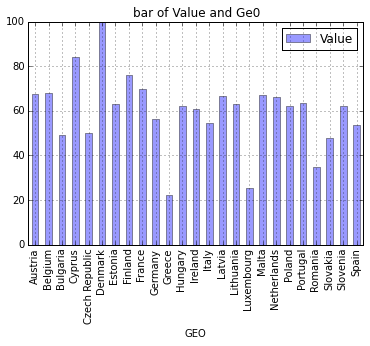

In [87]:
%matplotlib inline 
import matplotlib.pyplot as plt

group.drop('TIME', axis=1).plot(kind='bar',style='b', alpha=0.4)
plt.title("bar of Value and Ge0")
plt.figure()


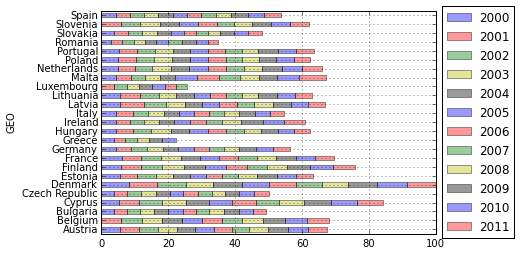

In [88]:
piveduCtry=pd.pivot_table(eduCtry, values='Value', rows=['GEO'],columns = ['TIME'])
piveduCtry= piveduCtry.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
piveduCtry = piveduCtry.fillna(0) #FILL NaN with 0
my_colors = ['b', 'r', 'g', 'y', 'k']*3 #By default ColorMap has only 5 colours
ax=piveduCtry.plot(kind='barh',stacked=True, color=my_colors ,alpha=0.4)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #By default legend goes inside plot area

#Merge


1M MovieLens database (http://www.grouplens.org/node/73) contains 1,000,209 ratings of 3,900 films made during yerar 2000 for 6040 anonymous users from MovieLens recommender Online (http://www.movielens.org)


The contents of the database are:

================================================================================

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

USERS FILE DESCRIPTION

================================================================================

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.  Only users who have provided some demographic information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

MOVIES FILE DESCRIPTION

================================================================================

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

Download the database and copy it to a local directory on your machine. (./ml-1m/)

Load the three files in the database into three `DataFrames`.

In [ ]:
import pandas as pd
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('./ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('./ml-1m/ratings.dat', sep='::', header=None, names=rnames,  engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('./ml-1m/movies.dat', sep='::', header=None, names=mnames,  engine='python')

To work with these data, the first step is to obtain a unique structure containing all the information. To do this we can use the function `merge` of pandas. This function automatically infers which columns should be used for the `merge` based on the names that are intersecting:


In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
print data[:10]

#Exercises: 

**MovieLens database**

1- Filter films that have received at least 250 ratings:

In [ ]:
### Your Code HERE

2- Obtain the mean ratings for each movie grouped by gender that have at least 250 ratings. 

In [ ]:
### Your Code HERE

3- Show films more valued by women.

In [ ]:
### Your Code HERE

4- Now we wonder which movies are rated more differently between men and women. Which films have more different rating and are more highly valued by women? And the films preferred by men which doesn't liked women? What are the films that have generated the most discordant ratings, regardless of gender?

In [ ]:
### Your Code HERE

5- Calculate the average rating of each user. 

In [ ]:
### Your Code HERE

What is the highest rated movie in average?

In [ ]:
### Your Code HERE

6- Define a function called  <b>top_movies</b> that given a user it returns what movies have the highest rank for this user.

def top_movies(user)


**Data from Excel**

7- Read data from excel files: `MunicipisCatalunya.xlsx` and `BBDD_1_OCTUBRE_WEB_SÍ.xslx`. Browse their contents and find the % of catalan municipalities that supports a ballot for the self-determination of Catalonia at 1st of October.

In [ ]:
### Your Code HERE

** Data from CSV**

8- Read data from csv file: `ma-ba.csv`. Count the number of times `Barça` wins `Madrid` and compute the stadistics of % win, % lose and % draw.

In [ ]:
### Your Code HERE

#Further Reading
Pandas has much more functionalities. Check out the (very readable) pandas docs if you want to learn more:

http://pandas.pydata.org/pandas-docs/stable/